# Digit Recognition with TensorFlow and MNIST Dataset

The MNIST database of handwritten digits, available from [Yann LeCun's website](http://yann.lecun.com/exdb/mnist/), comprises a training set of 60,000 examples and a test set of 10,000 examples. This dataset is derived from a larger set originally hosted by NIST. Each digit has been size-normalized and centered within a fixed-size image, making MNIST an excellent dataset for those who wish to apply learning techniques and pattern recognition methods to real-world data with minimal preprocessing effort.

In this notebook, we aim to build a machine learning model capable of recognizing handwritten digits accurately. The dataset includes images of digits ranging from 0 to 9. Our initial step will involve extracting features and labels from the dataset using simple tuples, setting the stage for model development and training.

<img src="https://upload.wikimedia.org/wikipedia/commons/f/f7/MnistExamplesModified.png" alt="MNIST digits" style="display: block; margin-left: auto; margin-right: auto; width: 50%;">


## Setup and Data Loading

Import Necessary Libraries

In [46]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import matplotlib.pyplot as plt

# Ensure reproducibility
np.random.seed(0)
tf.random.set_seed(0)

Load dataset

In [47]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

The shape of our dataset

In [48]:
train_images.shape, test_images.shape, train_labels.shape, test_labels.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

Checking our training labels

In [49]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Checking our first digit of the training set

Text(0.5, 1.0, 'Digits')

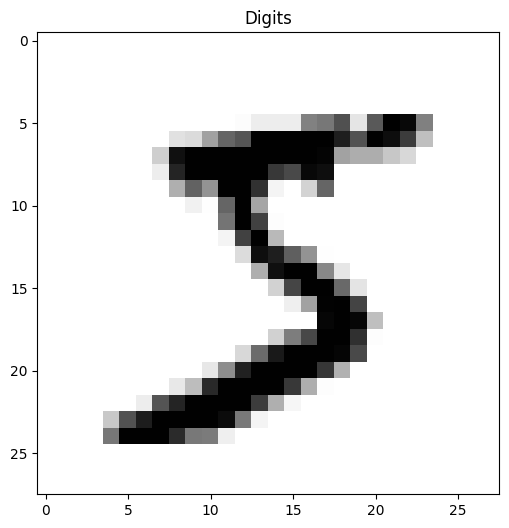

In [50]:
fig = plt.figure(figsize=(8, 6))
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.title('Digits')

## Data Preprocessing

Before we proceed with building and training the model, it is crucial to prepare our dataset through normalization and reshaping:

#### Normalization

The pixel values in the images are integers in the range [0, 255]. Normalizing these pixel values to the range [0, 1] is an important step because it makes the training process more efficient and stable. By scaling the pixel values, we help the model converge faster and reduce the chances of training instabilities that might arise from larger gradient values during backpropagation.

In [51]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [52]:
train_images.max() , train_images.min()

(1.0, 0.0)

#### Reshaping

The MNIST images are 28x28 pixels and are loaded as a flat array of 784 pixels. To prepare them for the convolutional neural network, which expects height x width x channels as the input shape, we need to reshape these arrays. Since the images are grayscale, the number of channels is 1.By reshaping the data to (28, 28, 1), we explicitly set the single color channel dimension, suitable for CNN input requirements.

In [53]:
train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))

#### Data Visualization

Visualizing the dataset is a crucial step in any data analysis as it allows us to understand the nature and quality of the data we are working with. For the MNIST dataset, we'll take a look at the first five images in the training set along with their corresponding labels. This visualization helps verify that the data has been loaded and processed correctly, and provides insight into the variation and complexity of the handwritten digits the model will be trained to recognize.

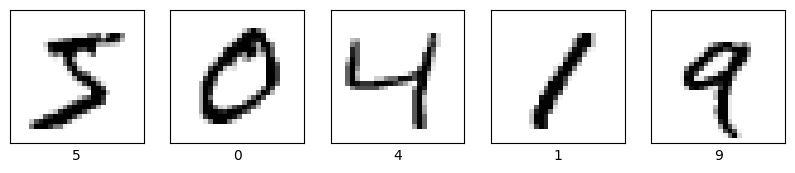

In [54]:
# Display the first 5 images and their labels
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

#### Model Architecture and Compilation

In this section, we construct and compile our model, which will be used for the task of recognizing handwritten digits from the MNIST dataset. The model architecture is designed to effectively extract and learn spatial hierarchies of features using convolutional layers followed by max pooling layers, and then classifying the outputs with dense layers. We will discuss each component of the model architecture and the reasons behind specific choices in its compilation.

In [55]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='linear'),
])

model.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


#### Detailed Breakdown of the Model

##### Convolutional Layers
The model begins with a sequence of convolutional layers (`Conv2D`), starting with 32 filters and increasing to 64. Each uses a 3x3 kernel and a 'relu' activation function. These layers are designed to extract various features from the input images, such as edges, textures, and other relevant patterns that are important for digit recognition.

##### Max Pooling Layers
Each convolutional layer is followed by a max pooling layer (`MaxPooling2D`), which reduces the spatial dimensions (height and width) of the output from the previous layer. This reduction helps in decreasing the computational load, memory usage, and also helps in making the detection of features invariant to scale and orientation changes.

##### Flattening
Post convolution and pooling, the `Flatten` layer is used to transform the entire feature map into a single 1D vector. This flattening step is necessary to transition from the 2D feature maps to 1D feature vectors suitable for the next dense layers.

##### Dense Layers
Following flattening, we have dense (fully connected) layers that further process features extracted by the convolutions through non-linear transformations. The last dense layer has 10 units with a linear activation function, corresponding to the 10 possible classes (digits 0-9).

##### Output Layer Activation
The use of a linear activation function in the last layer is a strategic choice when combined with the `SparseCategoricalCrossentropy(from_logits=True)` loss function. This configuration means the outputs are logits, and TensorFlow handles the application of the softmax function internally during loss calculation, enhancing numerical stability.

#### Model Compilation

- **Optimizer:** 'adam' - This optimizer is used for its efficient computation and low memory requirement. It adapts the learning rate for each weight of the model, which helps in achieving better results faster.

- **Loss Function:** `SparseCategoricalCrossentropy(from_logits=True)` - This choice is particularly suitable for cases where the classes are mutually exclusive. The `from_logits=True` parameter ensures that the softmax activation is applied on the logits before computing the loss, which provides numerical stability.

- **Metrics:** 'accuracy' - This is a common metric for classification problems to measure the fraction of correctly predicted instances.


This structure not only serves to build a robust model for digit recognition but also incorporates best practices such as using logits for numerical stability. The detailed summary provided by `model.summary()` will offer insights into the trainable parameters and the architecture flow, ensuring clarity and transparency in model development.

In [56]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

#### Model Training and Validation

In this section, we focus on training the model using the preprocessed image data. Training involves showing the model a portion of the data (the training set), which it uses to learn the underlying patterns. Validation is performed simultaneously by evaluating the model on a separate portion of the data, which helps monitor the model's performance and detect overfitting.

##### Explanation of Training Parameters

- **train_images and train_labels:** These are the features and labels for training. They are used as the primary data for the model to learn from.
- **epochs=10:** Specifies that the model should iterate through the training dataset ten times. Each epoch represents one complete pass through the entire dataset, allowing the model to learn and improve with each cycle.
- **validation_split=0.1:** Reserves 10% of the training data for validation purposes. The model will train on 90% of the data and validate its performance on the remaining 10%. This practice helps monitor the model's ability to generalize to new data and prevents overfitting.

##### Visualization of Training and Validation Metrics

After training the model, it is essential to visualize the training and validation accuracy and loss. These metrics provide insights into how well the model is learning and adapting to the data throughout the epochs. Visualizing these metrics helps identify if the model is improving and whether it is potentially overfitting or underfitting to the training data.

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8915 - loss: 0.3605 - val_accuracy: 0.9878 - val_loss: 0.0445
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9828 - loss: 0.0556 - val_accuracy: 0.9870 - val_loss: 0.0437
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9883 - loss: 0.0383 - val_accuracy: 0.9893 - val_loss: 0.0359
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9914 - loss: 0.0273 - val_accuracy: 0.9887 - val_loss: 0.0377
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9935 - loss: 0.0204 - val_accuracy: 0.9913 - val_loss: 0.0323
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9952 - loss: 0.0151 - val_accuracy: 0.9887 - val_loss: 0.0501
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9955 - loss: 0.0144 - val_accuracy: 0.9930 - val_loss: 0.0348
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9954 - loss:

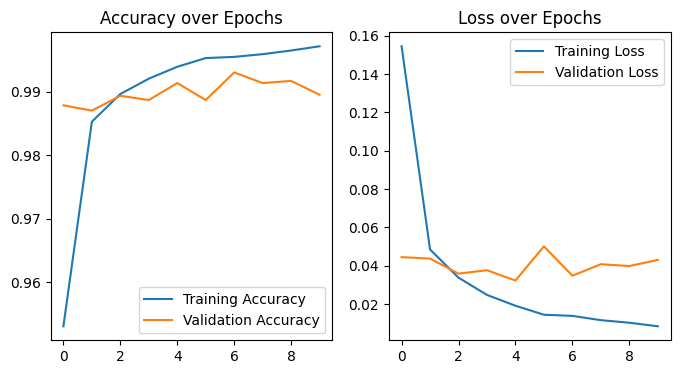

In [57]:
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.1)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()


##### Graph Descriptions:

- **Left Graph (Accuracy):** Displays the accuracy of the model during training (blue line) and validation (orange line). Ideally, both lines should show improvement and converge as training progresses. A significant gap between training and validation accuracy can indicate overfitting, where the model performs well on the training data but poorly on unseen data.

- **Right Graph (Loss):** Shows the loss of the model decreasing over time during training (blue line) and validation (orange line). An increasing validation loss while the training loss continues to decrease is a classic sign of overfitting, suggesting that the model is learning the noise in the training data rather than generalizing from it.

These visualizations are crucial for diagnosing issues in training, such as overfitting or underfitting, and for making informed decisions about whether more data, different architectures, or other modifications are necessary to improve the model's performance.

#### Model Evaluation Overview

This section evaluates the trained model on the test dataset to assess its performance across various metrics. A thorough evaluation not only involves accuracy but also examines the model's precision, recall, and its ability to distinguish between each class. We will cover the following:

1. Basic Performance Metrics (Accuracy and Loss)
2. Confusion Matrix
3. Classification Report
4. Misclassification Analysis
5. Receiver Operating Characteristic (ROC) Curves (for multi-class problems)


##### 1. Basic Performance Metrics

First, we evaluate the model to get the basic performance metrics: accuracy and loss. These metrics provide a quick snapshot of how well the model is performing on unseen data.




In [58]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print(f"Test accuracy: {test_acc:.4f}, Test loss: {test_loss:.4f}")

Test accuracy: 0.9906, Test loss: 0.0419


##### 2. Confusion Matrix

A confusion matrix is a table used to describe the performance of a classification model on a set of test data for which the true values are known. It allows easier visualization of the performance of an algorithm.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


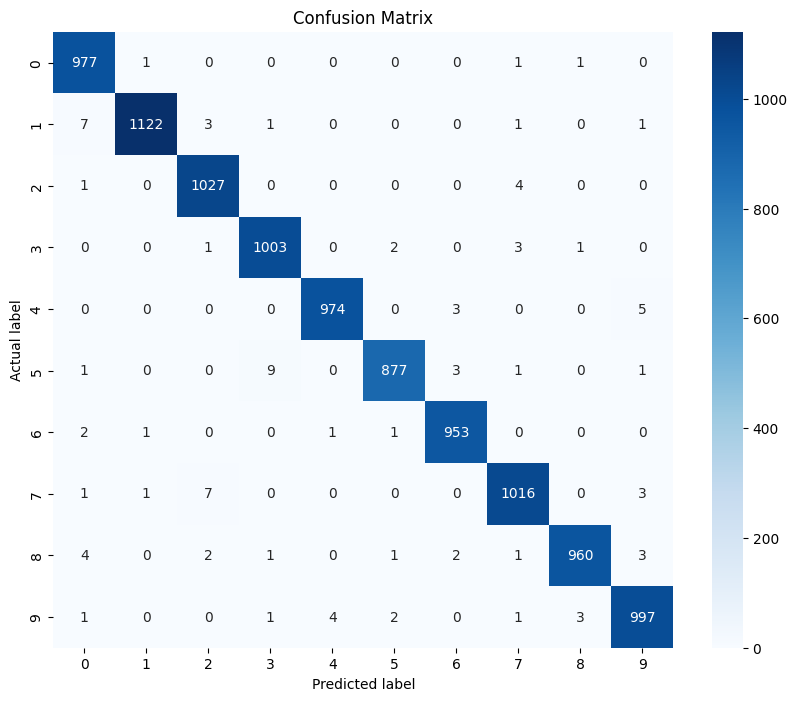

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the values from the test dataset
test_predictions = model.predict(test_images)
test_predictions_classes = np.argmax(test_predictions, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(test_labels, test_predictions_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

##### 3. Classification Report

The classification report displays the precision, recall, f1-score, and support for each class. This report provides deeper insights into the class-wise evaluation of the model, which is crucial for multi-class classification problems.

In [61]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, test_predictions_classes))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



##### 4. Misclassification Analysis

Visualizing misclassified images can help in understanding the model's weaknesses. By analyzing these examples, we can gain insights into why the model might be failing in certain cases.

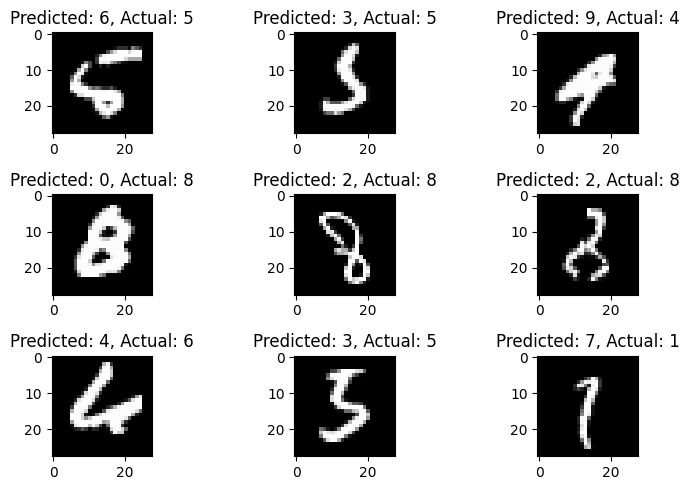

In [64]:
misclassified_idxs = np.where(test_predictions_classes != test_labels)[0]
plt.figure(figsize=(10, 5))
for i, mis_idx in enumerate(misclassified_idxs[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[mis_idx].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title(f"Predicted: {test_predictions_classes[mis_idx]}, Actual: {test_labels[mis_idx]}")
    plt.tight_layout()
plt.show()

### 5. Receiver Operating Characteristic (ROC) Curves

ROC curves are useful tools for diagnosing the performance of classifiers at various threshold settings. The ROC curve plots the true positive rate (TPR) against the false positive rate (FPR) at different threshold levels, providing insights into the trade-off between true positive and false positive rates.


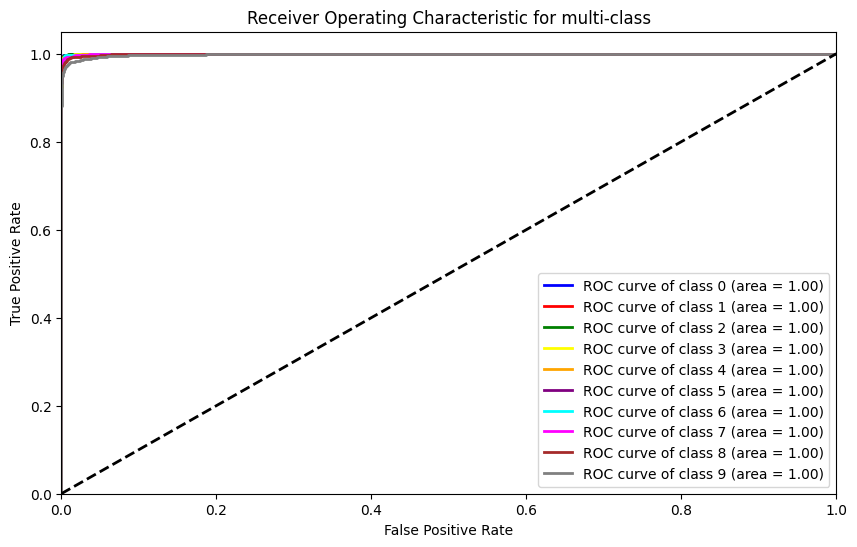

In [65]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Binarize the labels for each class
y_bin = label_binarize(test_labels, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
n_classes = y_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], test_predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 6))
colors = cycle(['blue', 'red', 'green', 'yellow', 'orange', 'purple', 'cyan', 'magenta', 'brown', 'gray'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for multi-class')
plt.legend(loc="lower right")
plt.show()